# Study friend information

This notebook looks at the players friend information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
api_calls_day = pd.Timestamp('2019-06-13')
churn_cutoff = api_calls_day - pd.Timedelta(3,'M')

In [3]:
df = pd.read_csv("player_friend_info_200k.csv",dtype={'steamid': str}).drop("Unnamed: 0", axis='columns')

In [4]:
df = df[pd.to_datetime(df['friend_since'], unit='s') < churn_cutoff]

In [5]:
df.head()

,friend_since,relationship,steamid,steamid_orig
0,1434524498,friend,76561198007070703,76561198199710782
1,1437740667,friend,76561198041503217,76561198199710782
2,1438264541,friend,76561198238259518,76561198199710782
3,1421677696,friend,76561197960448312,76561198049785932
4,1490267324,friend,76561197961426758,76561198049785932


In [6]:
df.tail()

,friend_since,relationship,steamid,steamid_orig
23957903,1439112895,friend,76561198240184600,76561198084135026
23957904,1465741880,friend,76561198256885545,76561198084135026
23957905,1449753326,friend,76561198267277378,76561198084135026
23957906,1462262043,friend,76561198273192861,76561198084135026
23957907,1492759425,friend,76561198322866773,76561198084135026


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22928655 entries, 0 to 23957907
Data columns (total 4 columns):
friend_since    int64
relationship    object
steamid         object
steamid_orig    int64
dtypes: int64(2), object(2)
memory usage: 874.7+ MB


In [8]:
df['steamid'].nunique()

9837216

In [9]:
df['steamid_orig'].nunique()

170877

In [10]:
df['relationship'].nunique()

1

In [11]:
df = df.drop('relationship',axis='columns')

In [12]:
#df['Root'] = (df['steamid_orig'] == 76561197960434622)

In [13]:
df.head()

,friend_since,steamid,steamid_orig
0,1434524498,76561198007070703,76561198199710782
1,1437740667,76561198041503217,76561198199710782
2,1438264541,76561198238259518,76561198199710782
3,1421677696,76561197960448312,76561198049785932
4,1490267324,76561197961426758,76561198049785932


In [14]:
df.tail()

,friend_since,steamid,steamid_orig
23957903,1439112895,76561198240184600,76561198084135026
23957904,1465741880,76561198256885545,76561198084135026
23957905,1449753326,76561198267277378,76561198084135026
23957906,1462262043,76561198273192861,76561198084135026
23957907,1492759425,76561198322866773,76561198084135026


In [15]:
#First_tier = list(df[df['Root']]['steamid'])

In [16]:
#df['First_tier'] = df['steamid_orig'].apply(lambda x: x in First_tier)

In [17]:
#Second_tier = list(df[df['First_tier']]['steamid'])

In [18]:
#df['Second_tier'] = df['steamid_orig'].apply(lambda x: x in Second_tier)

In [19]:
#df['Third_tier'] = ((~df['Second_tier']) & (~df['First_tier']))

In [20]:
#df[df['Third_tier']]

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df_num_Friends = (df.groupby('steamid_orig').count()['steamid']).to_frame()

In [23]:
df_num_Friends = df_num_Friends.reset_index()

In [24]:
df_num_Friends['num_Friends'] = df_num_Friends['steamid']

In [25]:
df_num_Friends[df_num_Friends['steamid_orig'] == 76561197960434622]

,steamid_orig,steamid,num_Friends
766,76561197960434622,174,174


In [26]:
df_num_Friends = df_num_Friends.drop('steamid',axis='columns')

In [27]:
df_num_Friends['steamid'] = df_num_Friends['steamid_orig']

In [28]:
df_num_Friends = df_num_Friends.drop('steamid_orig',axis='columns')

In [29]:
df_num_Friends.head()

,num_Friends,steamid
0,9,76561197960265730
1,174,76561197960265731
2,70,76561197960265733
3,91,76561197960265738
4,66,76561197960265743


In [30]:
df_max = df.loc[df.groupby('steamid_orig')['friend_since'].idxmax()]

In [31]:
df_max = df_max.reset_index()

In [32]:
df_max.head()

,index,friend_since,steamid,steamid_orig
0,5616118,1455906659,76561198018064800,76561197960265730
1,5119362,1534046531,76561198105633837,76561197960265731
2,6366238,1498068231,76561197972491988,76561197960265733
3,5043230,1548739620,76561198262909170,76561197960265738
4,5038909,1534367618,76561198348711414,76561197960265743


In [33]:
df_max[df_max['steamid_orig'] == 76561197960434622]

,index,friend_since,steamid,steamid_orig
766,5035903,1545543929,76561197994308495,76561197960434622


In [34]:
df_max['newest_friend_time'] = df_max['friend_since']

In [35]:
df_max['newest_friend_steamid'] = df_max['steamid']

In [36]:
df_max = df_max.drop(['index','friend_since','steamid'],axis='columns')
df_max.head()

,steamid_orig,newest_friend_time,newest_friend_steamid
0,76561197960265730,1455906659,76561198018064800
1,76561197960265731,1534046531,76561198105633837
2,76561197960265733,1498068231,76561197972491988
3,76561197960265738,1548739620,76561198262909170
4,76561197960265743,1534367618,76561198348711414


In [37]:
df_max['steamid'] = df_max['steamid_orig']
df_max = df_max.drop('steamid_orig',axis='columns')
df_max.head()

,newest_friend_time,newest_friend_steamid,steamid
0,1455906659,76561198018064800,76561197960265730
1,1534046531,76561198105633837,76561197960265731
2,1498068231,76561197972491988,76561197960265733
3,1548739620,76561198262909170,76561197960265738
4,1534367618,76561198348711414,76561197960265743


In [38]:
df_max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170877 entries, 0 to 170876
Data columns (total 3 columns):
newest_friend_time       170877 non-null int64
newest_friend_steamid    170877 non-null object
steamid                  170877 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.9+ MB


In [39]:
df_max.nunique()

newest_friend_time       168151
newest_friend_steamid    156637
steamid                  170877
dtype: int64

In [40]:
df_min = df.loc[df.groupby('steamid_orig')['friend_since'].idxmin()]

In [41]:
df_min = df_min.reset_index()

In [42]:
df_min.head()

,index,friend_since,steamid,steamid_orig
0,5616116,1347313517,76561197974593417,76561197960265730
1,5119192,0,76561197960265733,76561197960265731
2,6366204,0,76561197960265731,76561197960265733
3,5043142,0,76561197960265731,76561197960265738
4,5038844,0,76561197960265737,76561197960265743


In [43]:
df_min[df_min['steamid_orig'] == 76561197960434622]

,index,friend_since,steamid,steamid_orig
766,5035800,0,76561197960408176,76561197960434622


In [44]:
df_min['oldest_friend_time'] = df_min['friend_since']

In [45]:
df_min['oldest_friend_steamid'] = df_min['steamid']

In [46]:
df_min = df_min.drop(['index','friend_since','steamid'],axis='columns')
df_min.head()

,steamid_orig,oldest_friend_time,oldest_friend_steamid
0,76561197960265730,1347313517,76561197974593417
1,76561197960265731,0,76561197960265733
2,76561197960265733,0,76561197960265731
3,76561197960265738,0,76561197960265731
4,76561197960265743,0,76561197960265737


In [47]:
df_min['steamid'] = df_min['steamid_orig']
df_min = df_min.drop('steamid_orig',axis='columns')
df_min.head()

df_min.info()

df_min.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170877 entries, 0 to 170876
Data columns (total 3 columns):
oldest_friend_time       170877 non-null int64
oldest_friend_steamid    170877 non-null object
steamid                  170877 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.9+ MB


oldest_friend_time       146337
oldest_friend_steamid    156450
steamid                  170877
dtype: int64

In [48]:
df_max.head()

,newest_friend_time,newest_friend_steamid,steamid
0,1455906659,76561198018064800,76561197960265730
1,1534046531,76561198105633837,76561197960265731
2,1498068231,76561197972491988,76561197960265733
3,1548739620,76561198262909170,76561197960265738
4,1534367618,76561198348711414,76561197960265743


In [49]:
df_min.head()

,oldest_friend_time,oldest_friend_steamid,steamid
0,1347313517,76561197974593417,76561197960265730
1,0,76561197960265733,76561197960265731
2,0,76561197960265731,76561197960265733
3,0,76561197960265731,76561197960265738
4,0,76561197960265737,76561197960265743


In [50]:
df_friend_extremes = df_max.merge(df_min,on=['steamid'],suffixes=('_max', '_min'))

In [52]:
#df_friend_extremes[df_friend_extremes['Root_max'] != df_friend_extremes['Root_min']]

In [53]:
#df_friend_extremes[df_friend_extremes['First_tier_max'] != df_friend_extremes['First_tier_min']]

In [54]:
#df_friend_extremes[df_friend_extremes['Second_tier_max'] != df_friend_extremes['Second_tier_min']]

In [55]:
df_friend_extremes.head()

,newest_friend_time,newest_friend_steamid,steamid,oldest_friend_time,oldest_friend_steamid
0,1455906659,76561198018064800,76561197960265730,1347313517,76561197974593417
1,1534046531,76561198105633837,76561197960265731,0,76561197960265733
2,1498068231,76561197972491988,76561197960265733,0,76561197960265731
3,1548739620,76561198262909170,76561197960265738,0,76561197960265731
4,1534367618,76561198348711414,76561197960265743,0,76561197960265737


In [56]:
#df_friend_extremes['Root'] = df_friend_extremes['Root_max']
#df_friend_extremes['First_tier'] = df_friend_extremes['First_tier_max']
#df_friend_extremes['Second_tier'] = df_friend_extremes['Second_tier_max']
#df_friend_extremes['Third_tier'] = df_friend_extremes['Third_tier_max']
#df_friend_extremes = df_friend_extremes.drop(['Root_max','Root_min','First_tier_max','First_tier_min','Second_tier_max','Second_tier_min','Third_tier_max','Third_tier_min'],axis='columns')

In [57]:
df_friend_extremes.head()

,newest_friend_time,newest_friend_steamid,steamid,oldest_friend_time,oldest_friend_steamid
0,1455906659,76561198018064800,76561197960265730,1347313517,76561197974593417
1,1534046531,76561198105633837,76561197960265731,0,76561197960265733
2,1498068231,76561197972491988,76561197960265733,0,76561197960265731
3,1548739620,76561198262909170,76561197960265738,0,76561197960265731
4,1534367618,76561198348711414,76561197960265743,0,76561197960265737


In [58]:
df_num_Friends.head()

,num_Friends,steamid
0,9,76561197960265730
1,174,76561197960265731
2,70,76561197960265733
3,91,76561197960265738
4,66,76561197960265743


In [59]:
df_friend_extremes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170877 entries, 0 to 170876
Data columns (total 5 columns):
newest_friend_time       170877 non-null int64
newest_friend_steamid    170877 non-null object
steamid                  170877 non-null int64
oldest_friend_time       170877 non-null int64
oldest_friend_steamid    170877 non-null object
dtypes: int64(3), object(2)
memory usage: 7.8+ MB


In [60]:
df_num_Friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170877 entries, 0 to 170876
Data columns (total 2 columns):
num_Friends    170877 non-null int64
steamid        170877 non-null int64
dtypes: int64(2)
memory usage: 2.6 MB


In [61]:
df_friend_summary = df_num_Friends.merge(df_friend_extremes,on='steamid')

In [62]:
df_friend_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170877 entries, 0 to 170876
Data columns (total 6 columns):
num_Friends              170877 non-null int64
steamid                  170877 non-null int64
newest_friend_time       170877 non-null int64
newest_friend_steamid    170877 non-null object
oldest_friend_time       170877 non-null int64
oldest_friend_steamid    170877 non-null object
dtypes: int64(4), object(2)
memory usage: 9.1+ MB


In [63]:
df_friend_summary.head()

,num_Friends,steamid,newest_friend_time,newest_friend_steamid,oldest_friend_time,oldest_friend_steamid
0,9,76561197960265730,1455906659,76561198018064800,1347313517,76561197974593417
1,174,76561197960265731,1534046531,76561198105633837,0,76561197960265733
2,70,76561197960265733,1498068231,76561197972491988,0,76561197960265731
3,91,76561197960265738,1548739620,76561198262909170,0,76561197960265731
4,66,76561197960265743,1534367618,76561198348711414,0,76561197960265737


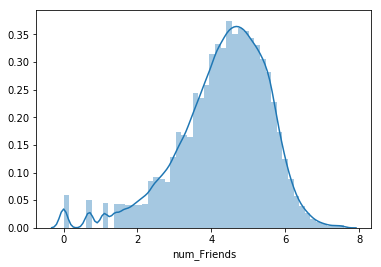

In [64]:
sns.distplot(np.log(df_friend_summary['num_Friends']))

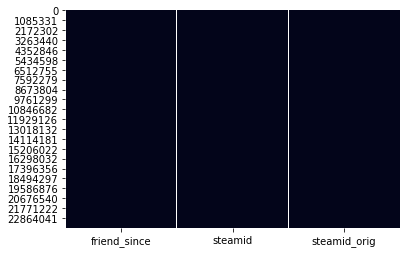

In [65]:
sns.heatmap(df.isnull(), cbar=False)

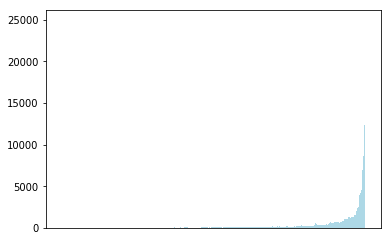

In [66]:
import datetime
# plot it
fig, ax = plt.subplots(1,1)
ax.hist(df_friend_summary[df_friend_summary['newest_friend_time'] > 1]['newest_friend_time'], bins=500, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

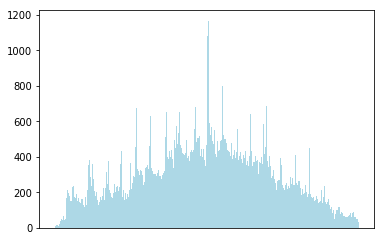

In [67]:
fig, ax = plt.subplots(1,1)
ax.hist(df_friend_summary[df_friend_summary['oldest_friend_time'] > 1]['oldest_friend_time'], bins=500, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

In [68]:
df_friend_summary.to_csv('200k_friend_summary.csv')

In [69]:
df_friend_summary['newest_friend_time'].max()

1552494760

In [70]:
pd.to_datetime(1552494489,unit='s')

Timestamp('2019-03-13 16:28:09')

In [71]:
df[df['friend_since'] == 0]

,friend_since,steamid,steamid_orig
2869,0,76561197981915762,76561197987188830
2874,0,76561197987525841,76561197987188830
3353,0,76561197971285546,76561197967904406
3356,0,76561197978723895,76561197967904406
3357,0,76561197978740509,76561197967904406
3360,0,76561197988450771,76561197967904406
4798,0,76561197972431700,76561197970772289
8199,0,76561197960432748,76561197979836566
8200,0,76561197960569236,76561197979836566
8202,0,76561197970819330,76561197979836566
